# **Economic Data Analysis**

The Economic Data Analysis project examines key financial and macroeconomic indicators—such as GDP, inflation, unemployment rate, interest rates, and product-level sales data—to understand economic trends and business performance.

The project includes data cleaning, exploratory analysis, trend visualization, correlation study, and simple forecasting (ARIMA). It analyzes customer demographics, product categories, costs, revenue, and profit to identify top-performing regions and items. Key insights include seasonal sales patterns, most profitable product categories, and relationships between major economic factors.

Overall, the project delivers clear insights into both macro-level economic conditions and micro-level business performance, helping guide data-driven financial decisions.

# **Imports**

In [60]:

import warnings, os, glob
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
def show():
    plt.tight_layout()
    plt.show()
print("Ready ✔")


Ready ✔


# **Load & Upload CSV File**

In [63]:

from google.colab import files
uploaded = files.upload()
import pandas as pd
filename = next(iter(uploaded))
df = pd.read_csv(filename, encoding='latin1')
print("File Loaded:", filename)
print("Rows, Cols:", df.shape)
df.head()

Saving EDA.csv to EDA.csv
File Loaded: EDA.csv
Rows, Cols: (139, 8)


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


# **Cleaning & Preparing Data**

In [64]:

# Cell 3 — cleaning
df = df.copy()
df.columns = [c.lower().strip().replace(" ", "_") for c in df.columns]

# numeric conversion
for c in df.columns:
    if df[c].dtype == object:
        temp = df[c].astype(str).str.replace(",", "").str.replace("%","")
        if temp.str.replace(".","",1).str.isnumeric().all():
            df[c] = pd.to_numeric(temp)

df.head()


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


# **Basic Summary**


In [65]:

display(df.info())
display(df.describe(include='all'))
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            139 non-null    int64  
 1   country                         139 non-null    object 
 2   cost_of_living_index            139 non-null    float64
 3   rent_index                      139 non-null    float64
 4   cost_of_living_plus_rent_index  139 non-null    float64
 5   groceries_index                 139 non-null    float64
 6   restaurant_price_index          139 non-null    float64
 7   local_purchasing_power_index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


None

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
count,139.000000,139,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
unique,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,70.000000,NaN,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,NaN,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,NaN,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,NaN,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,NaN,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,NaN,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000


Missing values:
 rank                              0
country                           0
cost_of_living_index              0
rent_index                        0
cost_of_living_plus_rent_index    0
groceries_index                   0
restaurant_price_index            0
local_purchasing_power_index      0
dtype: int64


# **Detect Important Columns Automatically**


In [66]:

def detect(keyword_list):
    for k in keyword_list:
        for c in df.columns:
            if k in c:
                return c
    return None
col_cost = detect(["cost_of_living", "overall_index", "cost"])
col_rent = detect(["rent"])
col_grocery = detect(["grocery"])
col_restaurant = detect(["restaurant"])
col_power = detect(["purchasing"])
print("Detected Columns:\n",
      "Cost:", col_cost,
      "\nRent:", col_rent,
      "\nGrocery:", col_grocery,
      "\nRestaurant:", col_restaurant,
      "\nPurchasing Power:", col_power)

Detected Columns:
 Cost: cost_of_living_index 
Rent: rent_index 
Grocery: None 
Restaurant: restaurant_price_index 
Purchasing Power: local_purchasing_power_index


# **Top 20 Expensive Cities**

In [67]:

if col_cost and "city" in df.columns:
    top20 = df.sort_values(col_cost, ascending=False).head(20)
    plt.figure(figsize=(10,6))
    sns.barplot(y="city", x=col_cost, data=top20, palette="rocket")
    plt.title("Top 20 Most Expensive Cities")
    show()
else:
    print("Missing required columns.")


Missing required columns.


# **Top 20 Cheapest Cities**

In [68]:

if col_cost and "city" in df.columns:
    low20 = df.sort_values(col_cost).head(20)
    plt.figure(figsize=(10,6))
    sns.barplot(y="city", x=col_cost, data=low20, palette="mako")
    plt.title("Top 20 Cheapest Cities")
    show()


# **Cost Distribution**

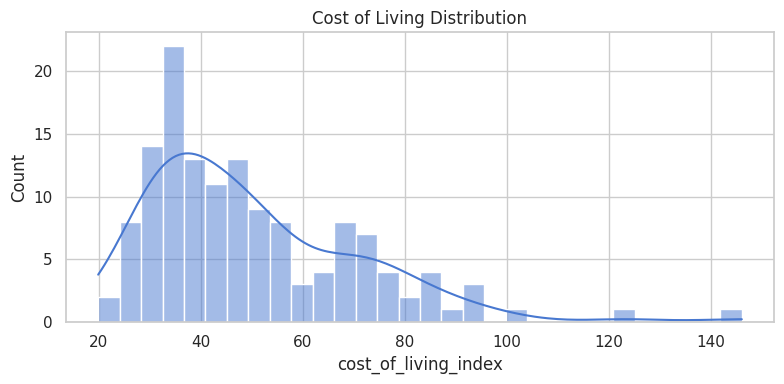

In [69]:

plt.figure(figsize=(8,4))
sns.histplot(df[col_cost], kde=True, bins=30)
plt.title("Cost of Living Distribution")
show()


# **Rent vs Cost Scatter**

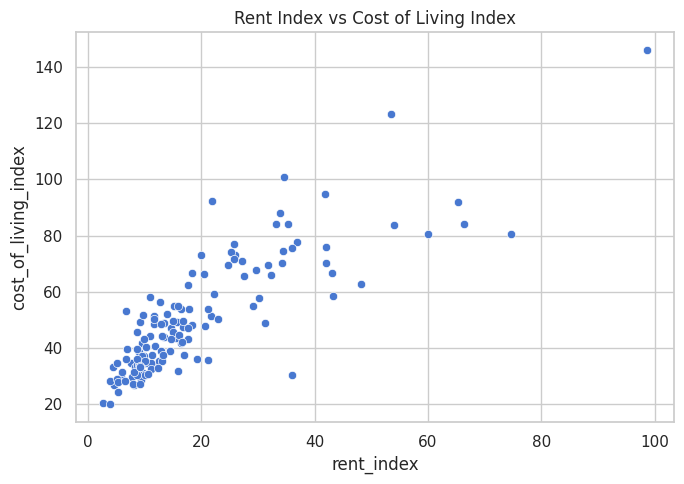

In [70]:

plt.figure(figsize=(7,5))
sns.scatterplot(x=col_rent, y=col_cost, data=df)
plt.title("Rent Index vs Cost of Living Index")
show()


# **Grocery vs Cost**


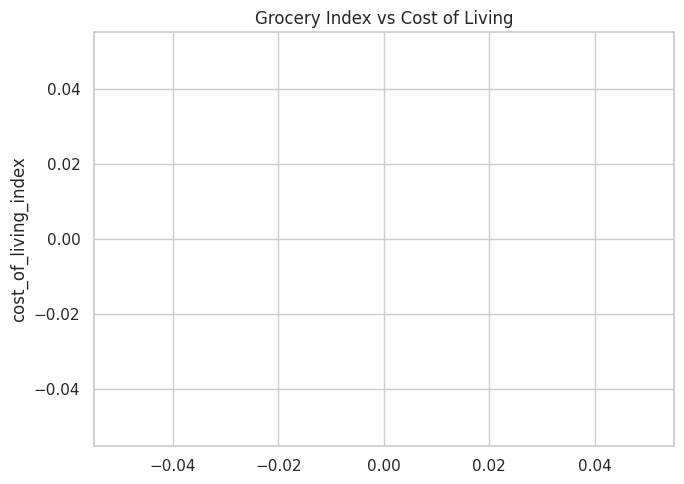

In [71]:

plt.figure(figsize=(7,5))
sns.scatterplot(x=col_grocery, y=col_cost, data=df)
plt.title("Grocery Index vs Cost of Living")
show()


# **Restaurant vs Cost**

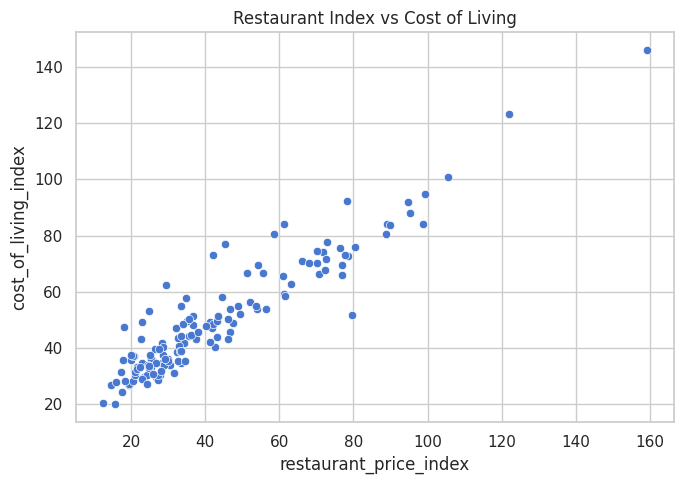

In [72]:

plt.figure(figsize=(7,5))
sns.scatterplot(x=col_restaurant, y=col_cost, data=df)
plt.title("Restaurant Index vs Cost of Living")
show()



# **Purchasing Power vs Cost**

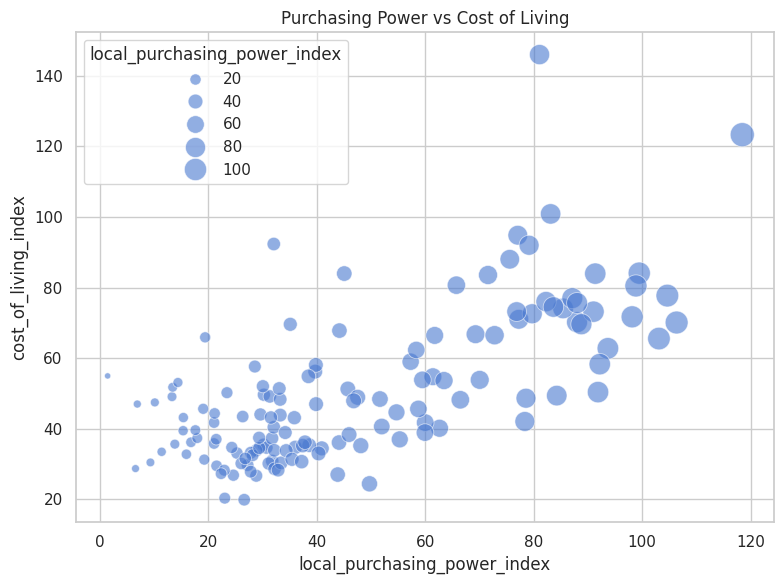

In [73]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=col_power, y=col_cost, size=col_power,
                sizes=(20,300), alpha=0.6, data=df)
plt.title("Purchasing Power vs Cost of Living")
show()


# **Correlation**

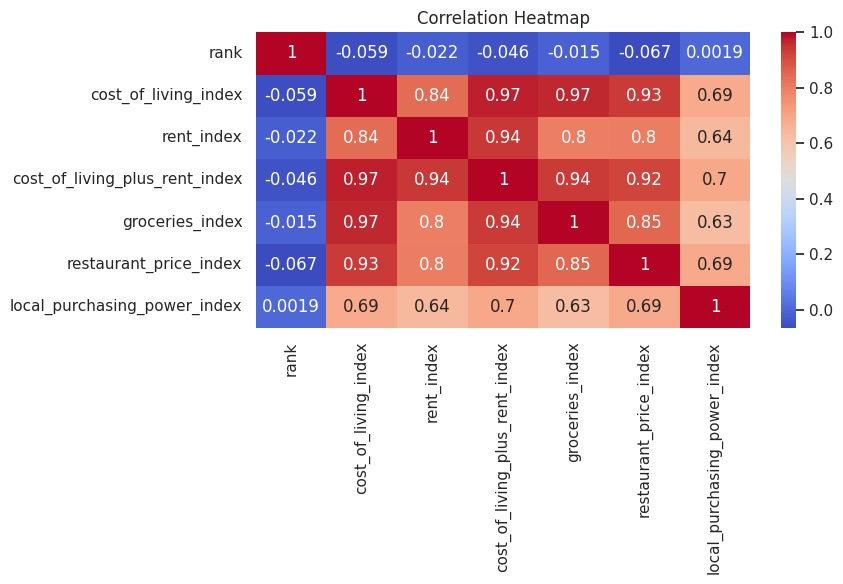

In [74]:

plt.figure(figsize=(9,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
show()


# **Map (choropleth) by country average cost — uses plotly**

In [75]:

try:
    import plotly.express as px
    if 'country' in df.columns and col_cost:
        country_avg = df.groupby('country')[col_cost].mean().reset_index()
        fig = px.choropleth(country_avg, locations='country', locationmode='country names',
                            color=col_cost, hover_name='country',
                            color_continuous_scale='OrRd', title='Average Cost of Living by Country')
        fig.update_layout(height=600)
        fig.show()
    else:
        print("Plot7 skipped — need 'country' and cost column.")
except Exception as e:
    print("Plot7 skipped — plotly not available or failed:", e)

# **Rank Plot**

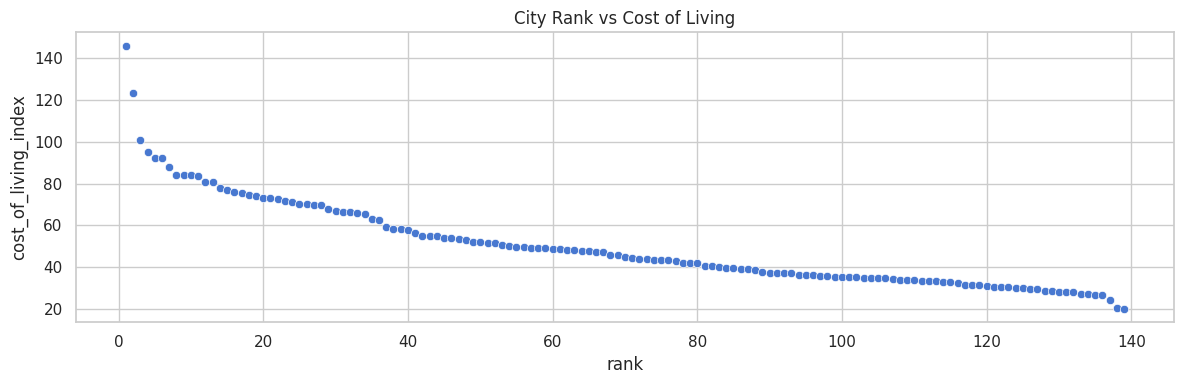

In [76]:

ranked = df.sort_values(col_cost, ascending=False).reset_index()
ranked['rank'] = ranked.index + 1
plt.figure(figsize=(12,4))
sns.scatterplot(x="rank", y=col_cost, data=ranked)
plt.title("City Rank vs Cost of Living")
show()


# **Multi-Variable EDA**


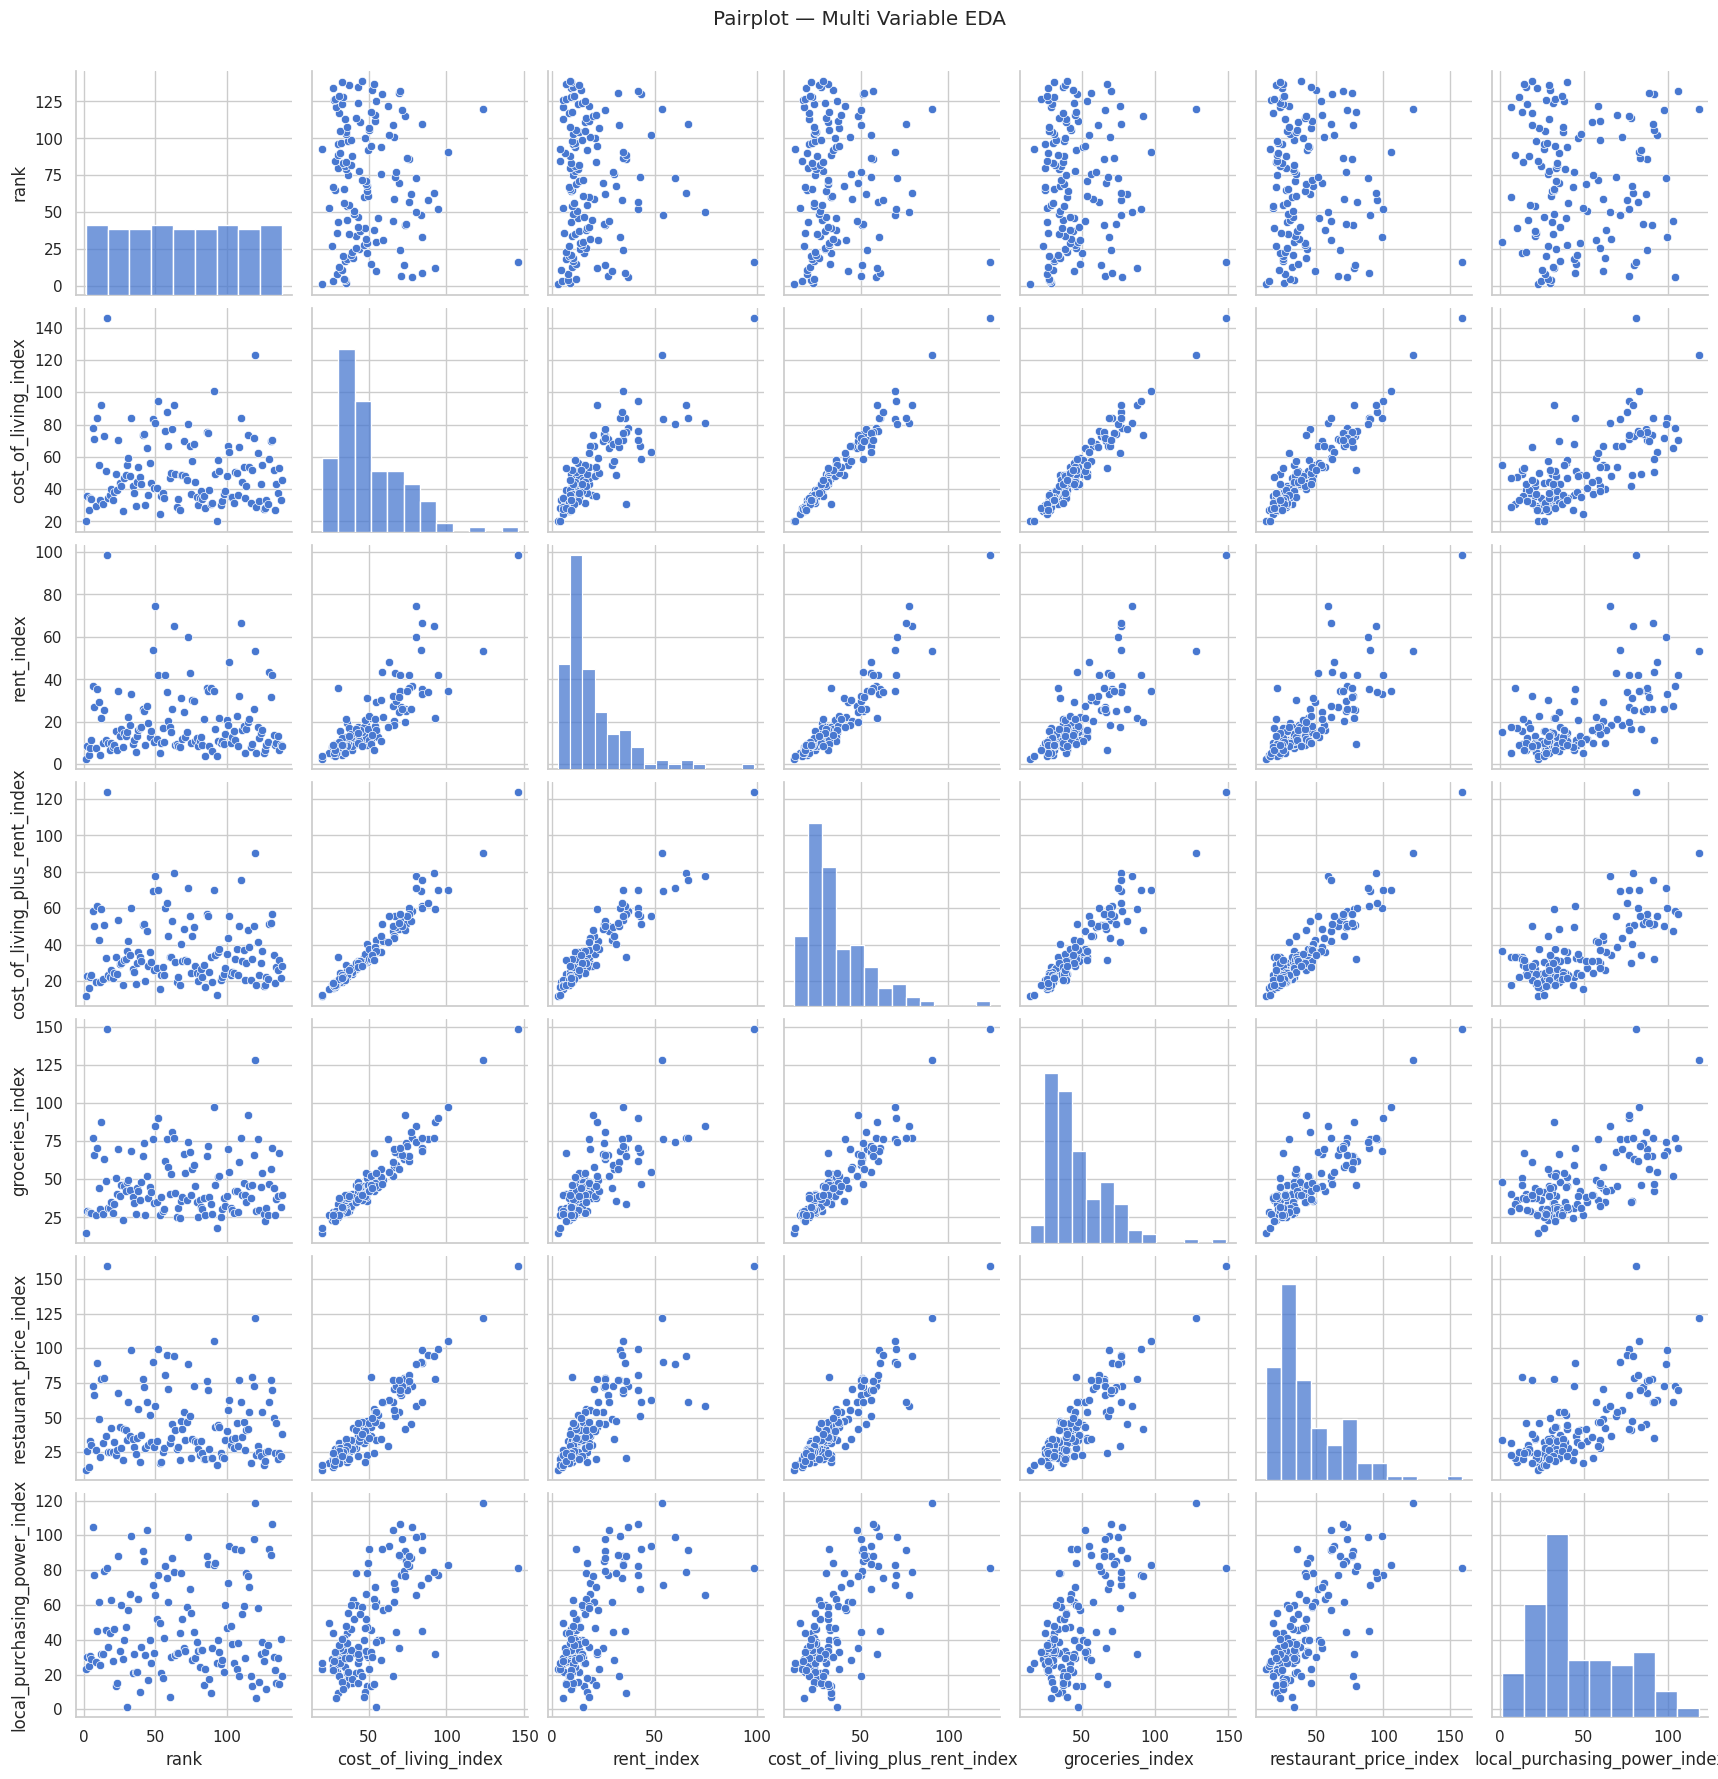

In [77]:

sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle("Pairplot — Multi Variable EDA", y=1.02)
plt.show()


# **ML Model — Predict Cost of Living**

In [78]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

num = df.select_dtypes(include=np.number).dropna()
X = num.drop(columns=[col_cost])
y = num[col_cost]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Model R2 Score:", r2_score(y_test, pred))

Model R2 Score: 0.9999998918259477


# **Save Cleaned File**


In [79]:

out = "/content/Cleaned_Cost_of_Living.csv"
df.to_csv(out, index=False)
print("Saved:", out)


Saved: /content/Cleaned_Cost_of_Living.csv
